In [147]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [149]:
# Load dataset
file_path = "./data/credit_risk_dataset.csv"
data = pd.read_csv(file_path)

# Display basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [150]:
# Display the first 5 rows of the DataFrame to get a quick overview of the data
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [151]:
# Display the last 5 rows
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [152]:
# Summary statistics for numerical columns
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [153]:
# Info about each feature with their data types
# 32581 total entries with 12 features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [154]:
# Count unique values in loan_status feature (This is the target variable)
data.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [155]:
# Count unique values in person_home_ownership feature
data.person_home_ownership.value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [156]:
# Count unique values in loan_intent feature
data.loan_intent.value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [157]:
# Count unique values in loan_grade feature
data.loan_grade.value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [158]:
# Count unique values in cb_person_default_on_file feature
data.cb_person_default_on_file.value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [159]:
# Total number of duplicate rows
data.duplicated().sum()

165

In [160]:
# Remove duplicate rows
data = data.drop_duplicates()
data.duplicated().sum()

0

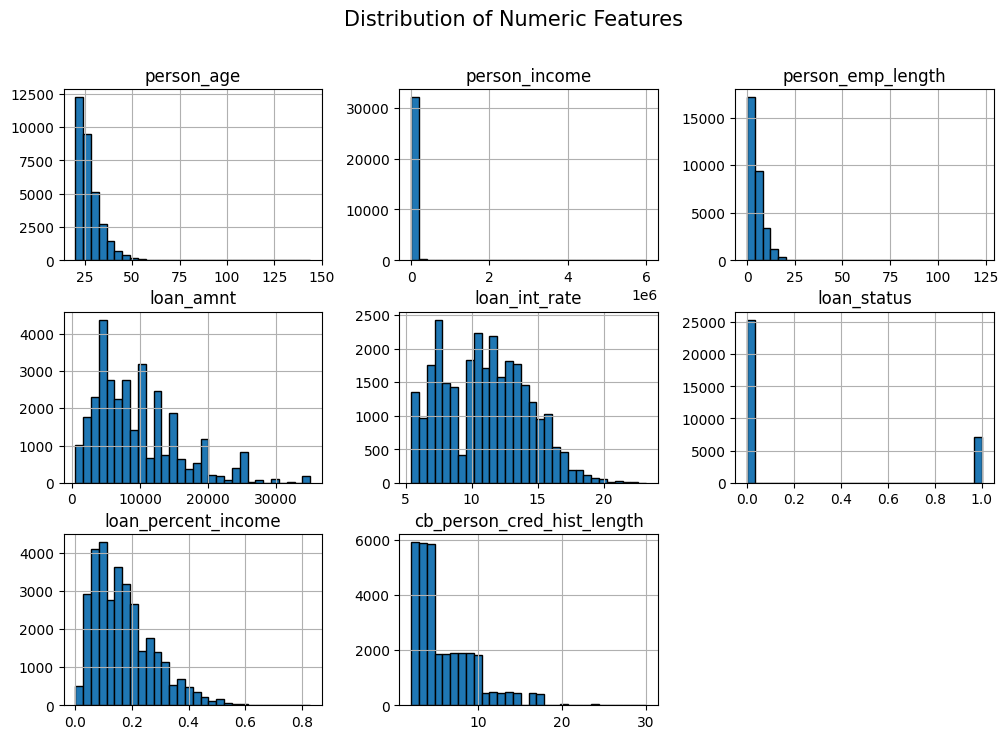

In [161]:
# Visualizing the distribution of Numeric Features using histograms
# Selecting only numberic cols
numerical_cols = data.select_dtypes(include=['int64', 'int32', 'float64'])
numerical_cols.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=15)
plt.show()

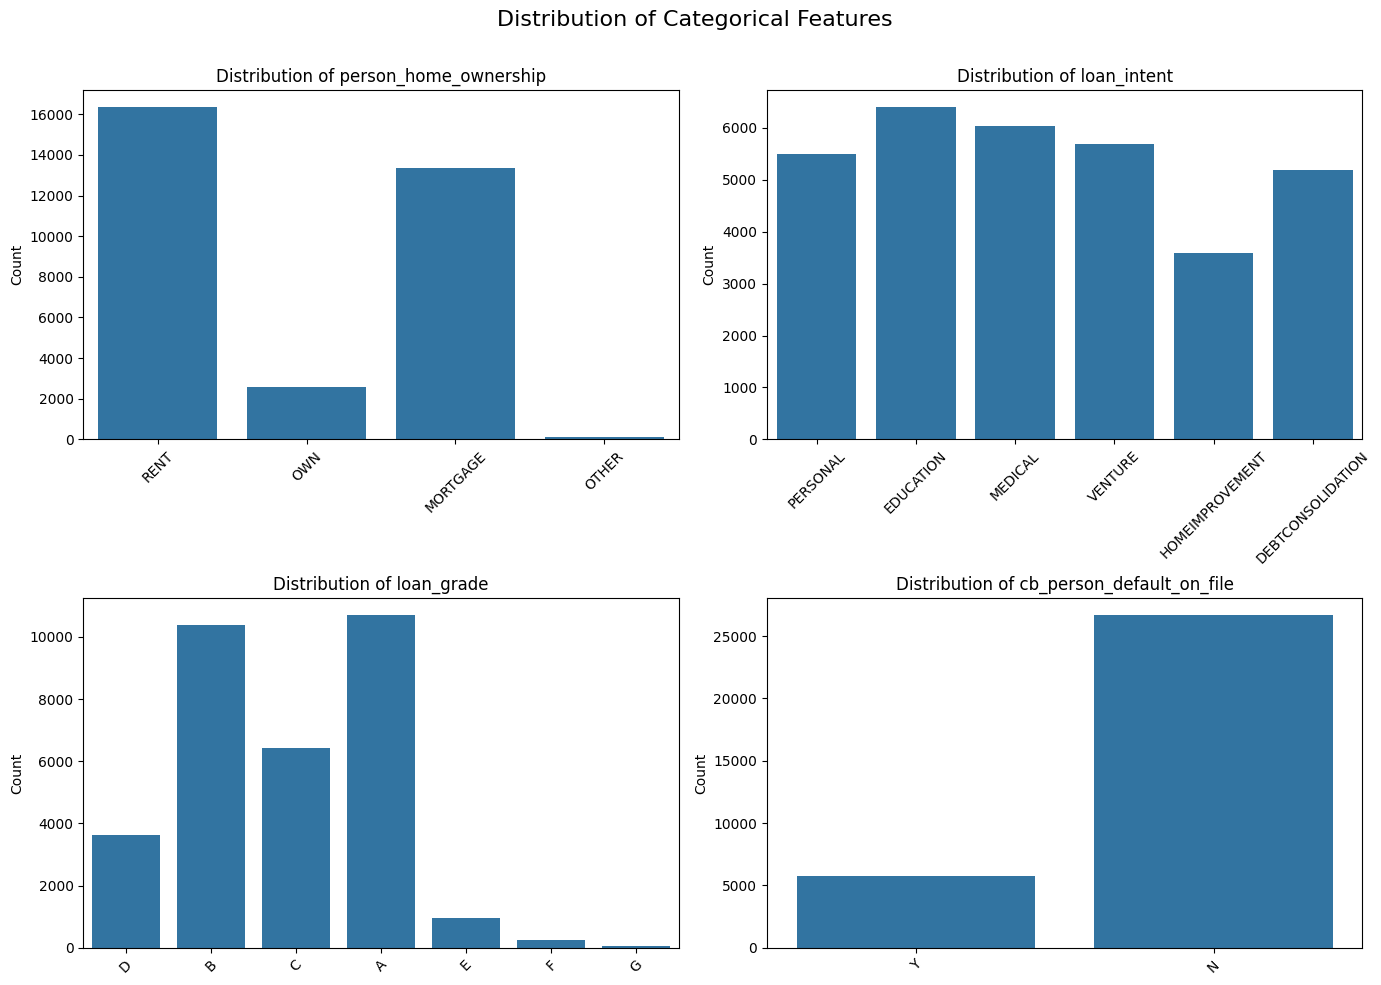

In [162]:
# Visualizing the distribution of Categorical Features using histograms

# Selecting only categorical cols
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid for 4 categorical columns
fig.suptitle('Distribution of Categorical Features', fontsize=16)

# Loop over each categorical column to plot
for ax, col in zip(axes.flatten(), categorical_columns):
    sns.countplot(x=col, data=data, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

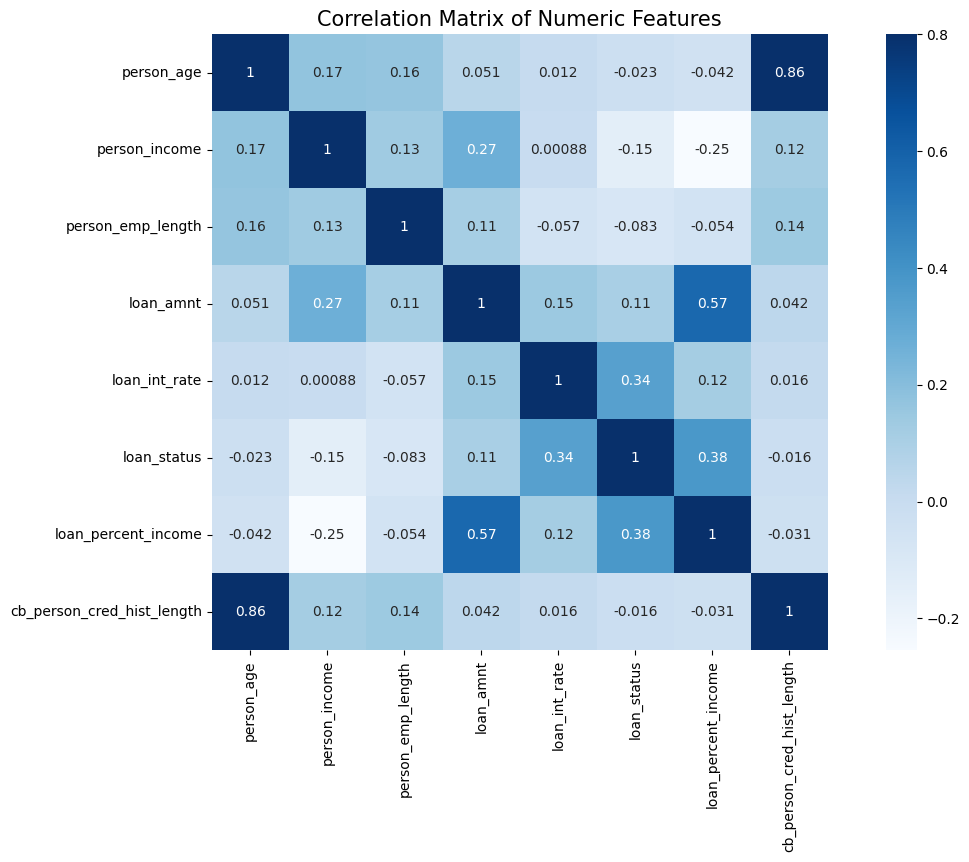

In [163]:
# Create the heatmap
# To understand the relationships between numeric features of the dataset
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(numerical_cols.corr(), vmax=0.8, square=True, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numeric Features', fontsize=15)
plt.show()

In [164]:
# Handling NULL values         
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

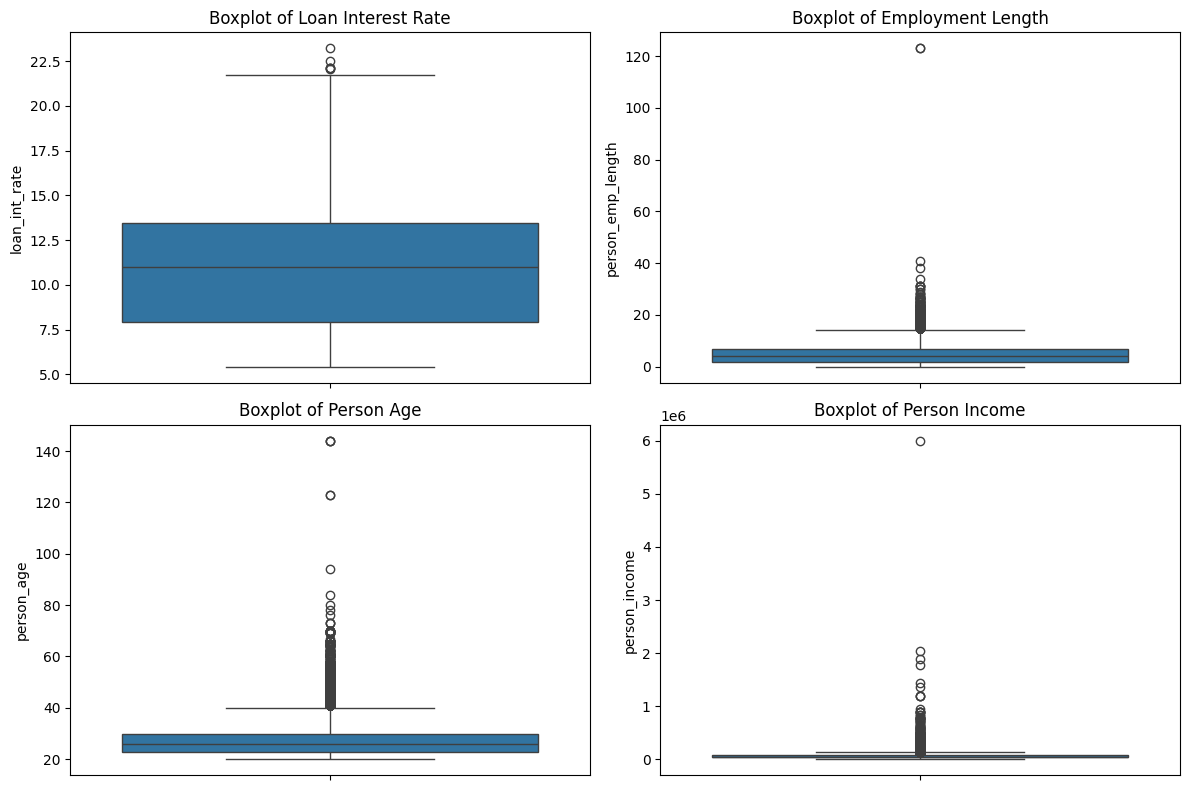

In [165]:
# Set figure size
plt.figure(figsize=(12, 8))  # Adjusted height for better spacing

# Boxplot for loan_int_rate
plt.subplot(2, 2, 1)  # Changed to 2x2 grid
sns.boxplot(y=data['loan_int_rate'])
plt.title("Boxplot of Loan Interest Rate")

# Boxplot for person_emp_length
plt.subplot(2, 2, 2)
sns.boxplot(y=data['person_emp_length'])
plt.title("Boxplot of Employment Length")

# Boxplot for person_age
plt.subplot(2, 2, 3)
sns.boxplot(y=data['person_age'])
plt.title("Boxplot of Person Age")

# Boxplot for person_income
plt.subplot(2, 2, 4)
sns.boxplot(y=data['person_income'])
plt.title("Boxplot of Person Income")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [166]:
# Checking for Outliers

# 1. Person Age 
# Initially the Max value was 144, which was most probably a typo
# The calculated upper bound for person_age is 40.5
# Therefore, age above 65 is considered unrealistic for credit assessment and only 35 such records were found

Q1 = data['person_age'].quantile(0.25)
Q3 = data['person_age'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5  * IQR

print("Upperbound :", upper_bound)

print(data[data['person_age'] > 65].shape[0] ,"records")

Upperbound : 40.5
35 records


In [167]:
# Remove records where person_age > 65
data = data[data['person_age'] < 65]
print("Filtered out unrealistic age outliers \n", data['person_age'].describe())

Filtered out unrealistic age outliers 
 count    32372.000000
mean        27.680001
std          6.038650
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         64.000000
Name: person_age, dtype: float64


In [168]:
# Checking for Outliers

# 2. Person Income 
# Initially the Max value was 6000000
# The calculated upper bound for person_income is 140250.0
# Therefore, the records with person income above 300000 is removed to drop extreme outliers and only 136 such records were found

Q1 = data['person_income'].quantile(0.25)
Q3 = data['person_income'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + 1.5 * IQR

print("Upperbound :", upper_bound)

print(data[data['person_income'] > 300000].shape[0], "records")

Upperbound : 140250.0
136 records


In [169]:
# Remove records where person_income > 300000
data = data[data['person_income'] <= 300000]
print("Filtered out high-income outliers\n", data['person_income'].describe())

Filtered out high-income outliers
 count     32236.000000
mean      63865.601532
std       37427.269432
min        4000.000000
25%       38400.000000
50%       55000.000000
75%       78501.000000
max      300000.000000
Name: person_income, dtype: float64


In [170]:
# Checking for Outliers
# 3. Person Employment Length 

# Initially the Max value was 123, likely typo too
# The calculated upper bound for person_emp_length is 14.5
# Therefore, the records with employment length above 30 is removed to drop extreme outliers and only 8 such records were found

Q1 = data['person_emp_length'].quantile(0.25)
Q3 = data['person_emp_length'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + 1.5 * IQR

print("Upperbound :", upper_bound)
print(data[data['person_emp_length'] > 30].shape[0], "records")


Upperbound : 14.5
8 records


In [171]:
# Remove records where person_emp_length > 30
data = data[data['person_emp_length'] <= 30]
print("Filtered out employee length outliers\n", data['person_emp_length'].describe())

Filtered out employee length outliers
 count    31344.000000
mean         4.766909
std          4.003536
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: person_emp_length, dtype: float64


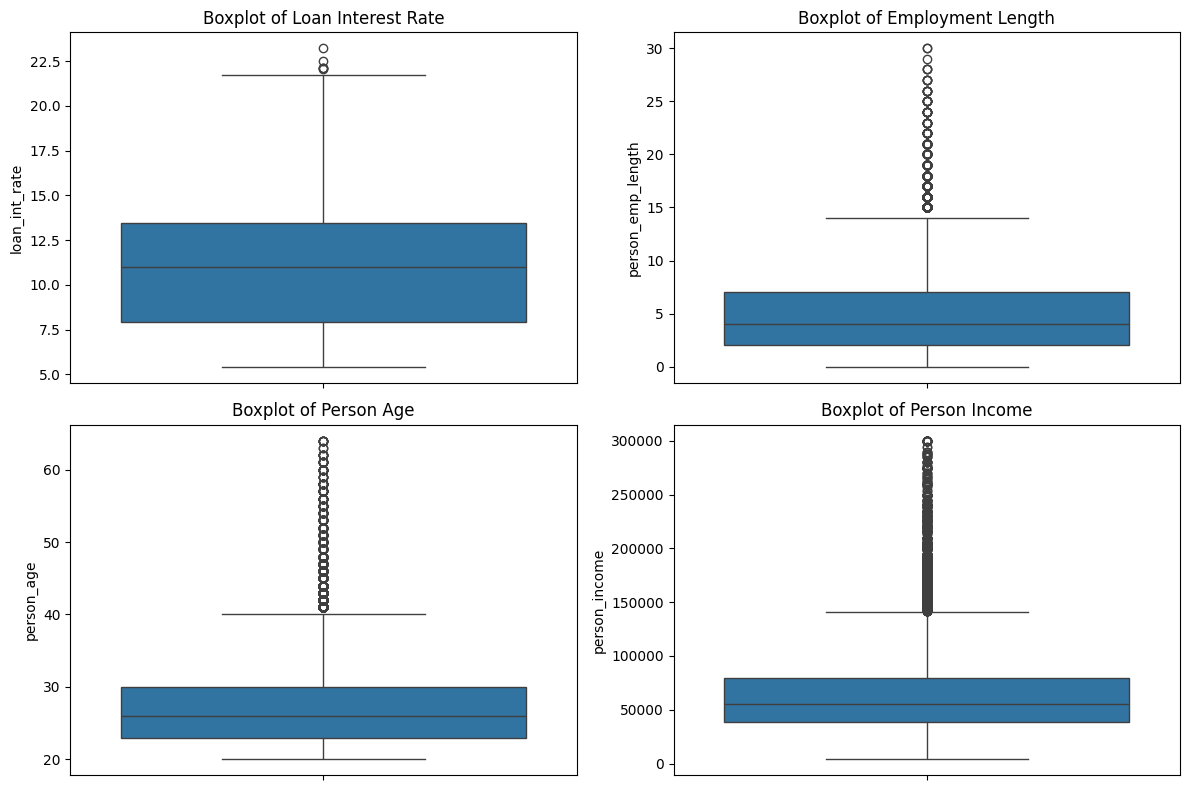

In [172]:
# Set figure size
plt.figure(figsize=(12, 8))  # Adjusted height for better spacing

# Boxplot for loan_int_rate
plt.subplot(2, 2, 1)  # Changed to 2x2 grid
sns.boxplot(y=data['loan_int_rate'])
plt.title("Boxplot of Loan Interest Rate")

# Boxplot for person_emp_length
plt.subplot(2, 2, 2)
sns.boxplot(y=data['person_emp_length'])
plt.title("Boxplot of Employment Length")

# Boxplot for person_age
plt.subplot(2, 2, 3)
sns.boxplot(y=data['person_age'])
plt.title("Boxplot of Person Age")

# Boxplot for person_income
plt.subplot(2, 2, 4)
sns.boxplot(y=data['person_income'])
plt.title("Boxplot of Person Income")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [173]:
# Handling NULL values         
data.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3005
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [174]:
# Imputing using median as this is skewed data
data = data.assign(
    loan_int_rate=data['loan_int_rate'].fillna(data['loan_int_rate'].median())
)

In [175]:
# Handling NULL values         
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [176]:
data.loan_status.value_counts()

loan_status
0    24559
1     6785
Name: count, dtype: int64

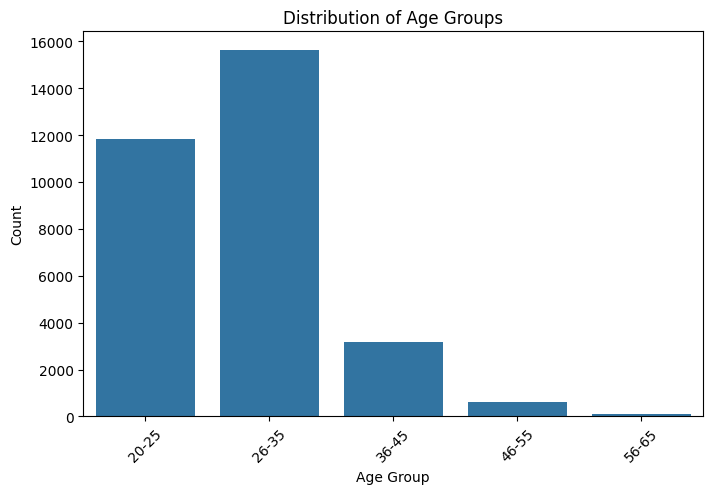

In [177]:
# Feature Engineering - Creating New Features using Binning to derive meaningful insights

# Helps in analyzing and understanding credit behavior across age groups
age_bins = [20, 25, 35, 45, 56, 65]  # Updated to include 65 as the max age
age_labels = ['20-25', '26-35', '36-45', '46-55', '56-65'] 

# Create a new column for age groups
data['age_group'] = pd.cut(data['person_age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = data['age_group'].value_counts().sort_index()

# Plot bar chart to visualize the distribution of age groups 
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups")
plt.xticks(rotation=45)
plt.show()


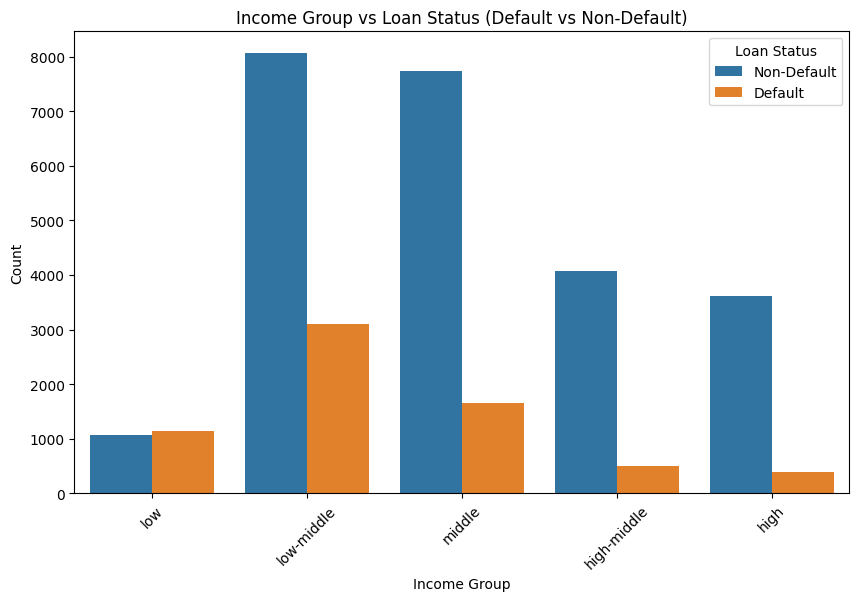

In [178]:
#Feature Engineering - Creating New Features using Binning to derive meaningful insights

# Define income bins and labels
income_bins = [0, 25000, 50000, 75000, 100000, float('inf')]
income_labels = ['low', 'low-middle', 'middle', 'high-middle', 'high']

# Categorize person_income into bins
data['income_group'] = pd.cut(data['person_income'], bins=income_bins, labels=income_labels, right=True)

# Set figure size
plt.figure(figsize=(10, 6))

# Create a countplot with hue for loan_status to differentiate defaults vs non-defaults
sns.countplot(data=data, x='income_group', hue='loan_status')

# Add labels and title
plt.title("Income Group vs Loan Status (Default vs Non-Default)")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Loan Status',  labels=['Non-Default', 'Default'], loc='upper right')

# Show the plot
plt.show()

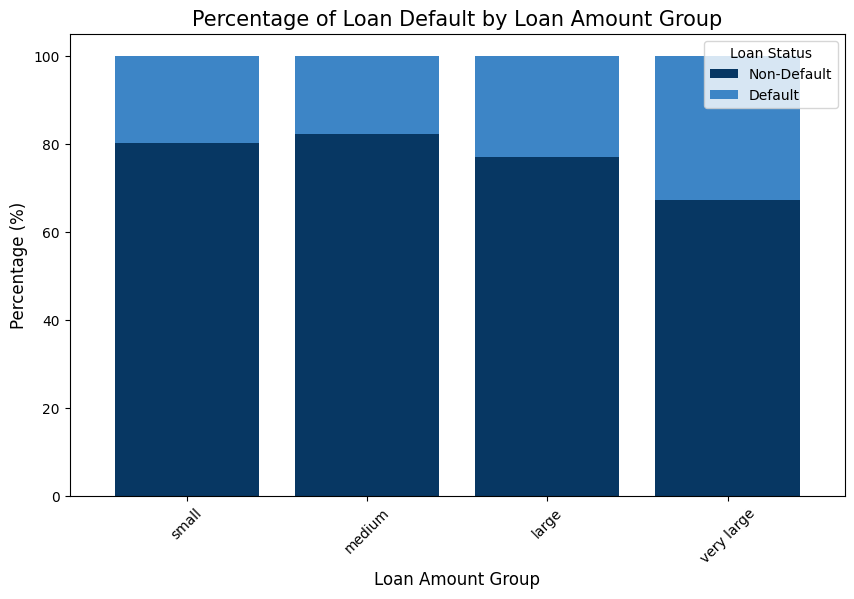

loan_status                0          1
loan_amount_group                      
small              80.151145  19.848855
medium             82.201930  17.798070
large              77.034055  22.965945
very large         67.259786  32.740214


In [179]:
# Feature Engineering - Creating New Features using Binning to derive meaningful insights

# Define loan bins and labels
loan_bins = [0, 5000, 10000, 15000, float('inf')]
loan_labels = ['small', 'medium', 'large', 'very large']

# Categorize loan amounts into defined bins
data['loan_amount_group'] = pd.cut(data['loan_amnt'], bins=loan_bins, labels=loan_labels, right=True)

# Create a cross-tab to show the distribution of loan status (default vs non-default) within each loan amount group
cross_tab = pd.crosstab(data['loan_amount_group'], data['loan_status'], normalize='index') * 100

# Plot stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#073763', '#3d85c6'], width=0.8)

# Add labels and title
plt.title('Percentage of Loan Default by Loan Amount Group', fontsize=15)
plt.xlabel('Loan Amount Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Loan Status', labels=['Non-Default', 'Default'], loc='upper right')

# Display the plot
plt.show()

# Print the cross-tab to view the proportions
print(cross_tab)


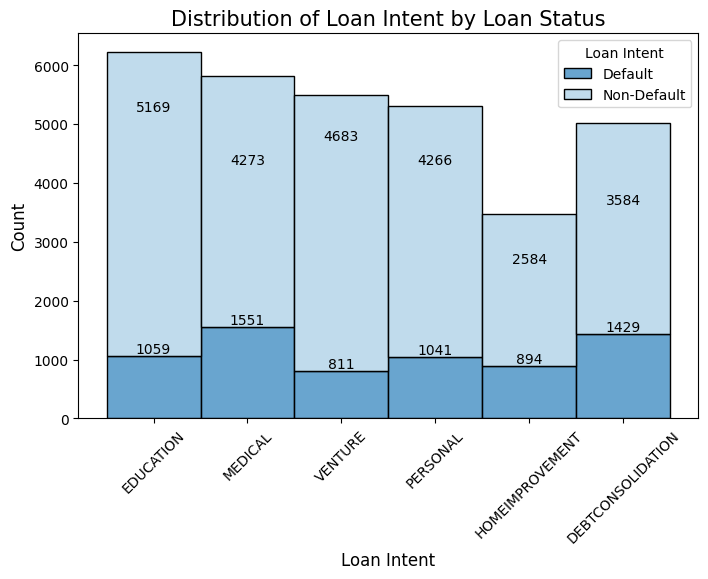

In [180]:
# Plot histogram to visualize the distribution of loan_intent categories with loan_status
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='loan_intent', hue='loan_status', discrete=True, kde=False, 
             multiple='stack', bins=len(data['loan_intent'].unique()), palette='Blues')

plt.title('Distribution of Loan Intent by Loan Status', fontsize=15)
plt.xlabel('Loan Intent', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Loan Intent', labels=['Default', 'Non-Default'], loc='upper right')

# Annotate the bars with counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), textcoords='offset points')

plt.show()


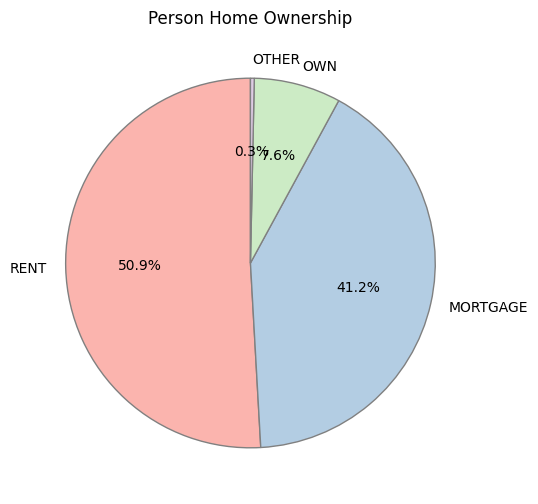

In [181]:
#  A pie chart to visualize occurrences of each category in person_home_ownership to understand distribution.
level_counts = data["person_home_ownership"].value_counts()  

# Create pie chart  
plt.figure(figsize=(6, 6))  
plt.pie(level_counts.values, labels=level_counts.index,  
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors,  
        wedgeprops={'edgecolor': 'gray'})  

plt.title("Person Home Ownership")  
plt.show()

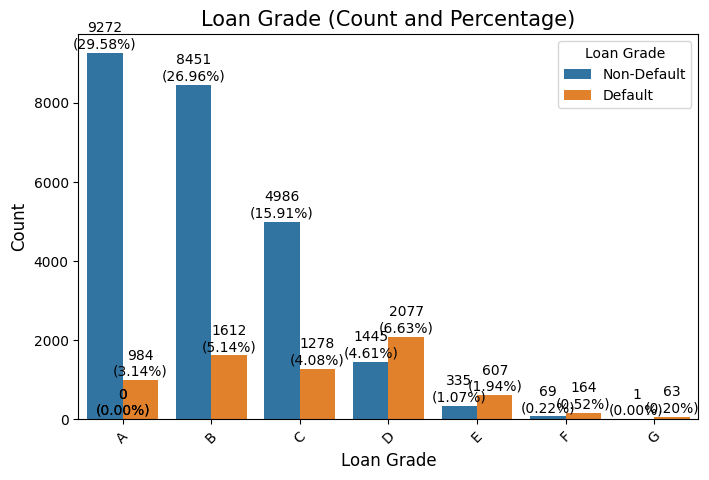

In [182]:
#  A bar chart to visualize loan grade distribution
loan_grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

plt.figure(figsize=(8, 5))
sns.countplot(x='loan_grade', data=data, order=loan_grade_order, hue='loan_status')
plt.title('Loan Grade (Count and Percentage)', fontsize=15)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45) 
plt.legend(title='Loan Grade',  labels=['Non-Default', 'Default'], loc='upper right')

total_count = len(data)  
for p in plt.gca().patches:
    count = p.get_height()
    percentage = (count / total_count) * 100 
    plt.gca().annotate(f'{count:.0f}\n({percentage:.2f}%)', 
                       (p.get_x() + p.get_width() / 2., count), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 12.0), textcoords='offset points')

plt.show()

loan_status                    0          1
person_home_ownership                      
MORTGAGE               87.481602  12.518398
OTHER                  68.269231  31.730769
OWN                    93.067227   6.932773
RENT                   68.835810  31.164190


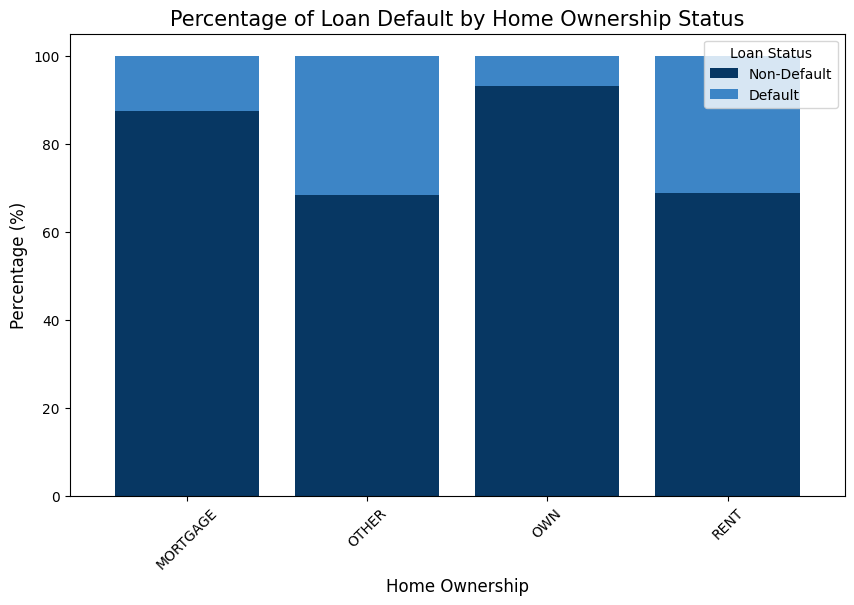

In [183]:
# Visualize the proportion of defaults and non-defaults for each home ownership status
cross_tab = pd.crosstab(data['person_home_ownership'], data['loan_status'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#073763', '#3d85c6'], width=0.8)

plt.title('Percentage of Loan Default by Home Ownership Status', fontsize=15)
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Loan Status', labels=['Non-Default', 'Default'], loc='upper right')
print(cross_tab)
plt.show()

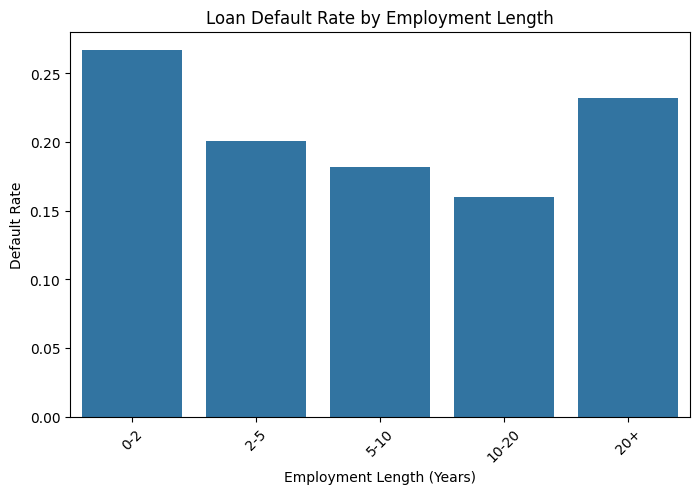

person_emp_length
0-2      0.267065
2-5      0.200632
5-10     0.181488
10-20    0.160231
20+      0.232323
Name: loan_status, dtype: float64


In [184]:
# Feature Engineering - Grouping features to derive meaningful insights
# Categorize employment length into bins (0-2, 2-5, 5-10, 10-20, 20+ years) for better analysis
# Visualize to understand how the likelihood of loan default varies based on the borrower's work experience

default_by_emp_length = data.groupby(pd.cut(data['person_emp_length'], bins=[0, 2, 5, 10, 20, 100], 
                                             labels=['0-2', '2-5', '5-10', '10-20', '20+']), observed=True)['loan_status'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=default_by_emp_length.index, y=default_by_emp_length.values)
plt.title("Loan Default Rate by Employment Length")
plt.xlabel("Employment Length (Years)")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.show()
print(default_by_emp_length)


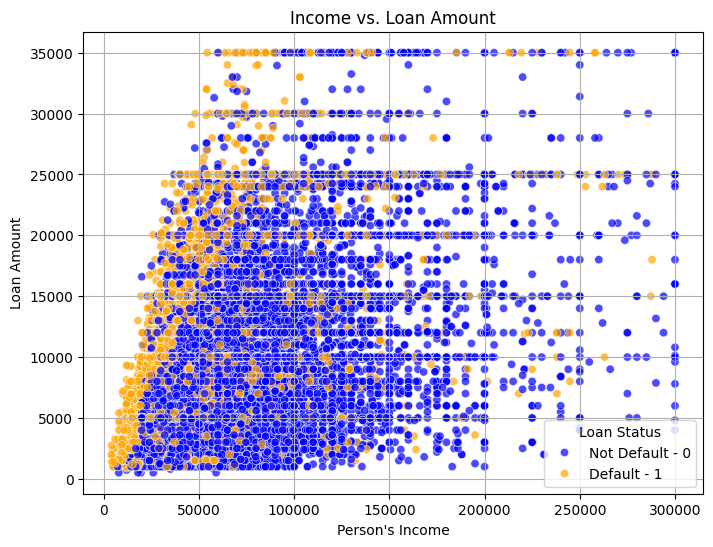

In [185]:
# A scatter plot to visualize the relationship between income and loan amount
# Differentiates the data points based on the loan status
plt.figure(figsize=(8,6))
scatter = sns.scatterplot(x="person_income", y="loan_amnt", hue="loan_status", palette={0: "blue", 1: "orange"}, data=data, alpha=0.7)

# Customizing the legend labels
legend_labels = {"0": "Not Default - 0", "1": "Default - 1"}
handles, labels = scatter.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels]  # Replace 0 and 1 with custom labels
plt.legend(handles, new_labels, title="Loan Status")
plt.xlabel("Person's Income")
plt.ylabel("Loan Amount")
plt.title("Income vs. Loan Amount")
plt.grid(True)

# Show plot
plt.show()

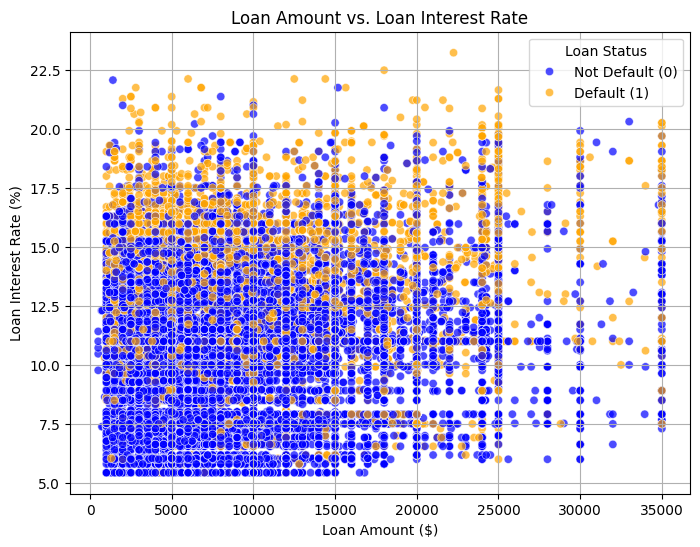

In [186]:
# Scatter plot visualizes the relationship between the loan amount and the loan interest rate
df = pd.DataFrame(data)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="loan_amnt", 
    y="loan_int_rate", 
    hue="loan_status", 
    palette={0: "blue", 1: "orange"},  # Blue = Not Default, Red = Default
    data=df, 
    alpha=0.7
)

plt.xlabel("Loan Amount ($)")
plt.ylabel("Loan Interest Rate (%)")
plt.title("Loan Amount vs. Loan Interest Rate")
plt.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Not Default (0)", "Default (1)"], title="Loan Status")
plt.show()

In [187]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,26-35,low,medium
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [188]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
age_group                     0
income_group                  0
loan_amount_group             0
dtype: int64

In [189]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,26-35,low,medium
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [190]:
# Feature Engineering - Creating New Features

# Loan-to-Income Ratio: Measures the proportion of the loan amount relative to the borrower's income
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Interest Rate-to-Loan Amount Ratio: Represents the interest rate as a fraction of the loan amount showing the cost of borrowing relative to the loan size
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']



In [191]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# ONE HOT ENCODING is used for nominal data
# LABEL ENCODING is used for ordinal data 

# Sample DataFrame
df = pd.DataFrame(data)

label_encoder = LabelEncoder()

ordinal_columns = ['age_group', 'income_group', 'loan_amount_group']

# Mapping of loan grades to integers
grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

# Apply the mapping to the 'loan_grade' column
df['loan_grade'] = df['loan_grade'].map(grade_mapping)



for col in ordinal_columns:
    df[col] = label_encoder.fit_transform(df[col])

nominal_categorical_columns = ['person_home_ownership', 'loan_intent']

onehot_encoder = OneHotEncoder(sparse_output=False)  

encoded_array = onehot_encoder.fit_transform(df[nominal_categorical_columns])

encoded_df = pd.DataFrame(encoded_array, columns=onehot_encoder.get_feature_names_out(nominal_categorical_columns))

# Reset indices of both DataFrames to ensure they align
df_reset = df.reset_index(drop=True)
encoded_df_reset = encoded_df.reset_index(drop=True)

# Now concatenate them
df_encoded = pd.concat([df_reset.drop(columns=nominal_categorical_columns), encoded_df_reset], axis=1)


df_encoded['cb_person_default_on_file'] = df_encoded['cb_person_default_on_file'].map({'N': 0, 'Y': 1})

In [192]:
df_encoded.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,21,9600,5.0,2,1000,11.14,0,0.10,0,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,25,9600,1.0,3,5500,12.87,1,0.57,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,23,65500,4.0,3,35000,15.23,1,0.53,0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,24,54400,8.0,3,35000,14.27,1,0.55,1,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,21,9900,2.0,1,2500,7.14,1,0.25,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [193]:
# Save preprocessed data to a new csv
df_encoded.to_csv('data/preprocessed-data.csv', index=False)

In [194]:
# Load preprocessed data to a new csv
file_path = "./data/preprocessed-data.csv"
preprocessed = pd.read_csv(file_path)

In [195]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt


scaler = StandardScaler()

X = preprocessed.drop(['loan_status', 'cb_person_cred_hist_length'], axis=1)  
y = preprocessed['loan_status']  # Target

X_scaled = scaler.fit_transform(X)
feature_names = X.columns # Get the col names


In [196]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Hyperparameters tuning
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Cross-validation
scores = cross_val_score(model, X_scaled, y, cv=5)
print(f'Cross-validation scores: {scores}')


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7424
           1       0.86      0.75      0.80      1980

    accuracy                           0.92      9404
   macro avg       0.90      0.86      0.88      9404
weighted avg       0.92      0.92      0.92      9404

Cross-validation scores: [0.87494018 0.89344393 0.91705216 0.90205774 0.9216656 ]


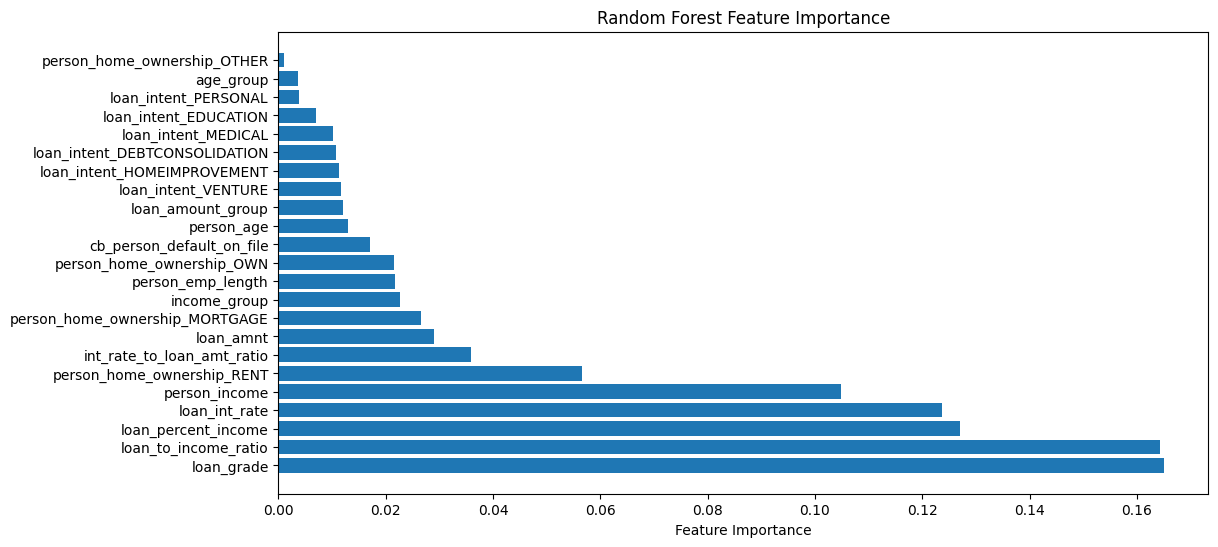

In [197]:
# Feature Importance
feature_importances = model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()